In [269]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [271]:
data=pd.read_csv('Housing.csv')
df=pd.DataFrame(data)


In [273]:
df['mainroad_encoded'] = LabelEncoder().fit_transform(df['mainroad'])
df['basement_encoded'] = LabelEncoder().fit_transform(df['basement'])
df['ac_encoded'] = LabelEncoder().fit_transform(df['airconditioning'])
df['guestroom_encided'] = LabelEncoder().fit_transform(df['guestroom'])
df['basement_encoded'] = LabelEncoder().fit_transform(df['basement'])
df['prefarea_encoded'] = LabelEncoder().fit_transform(df['prefarea'])
df['hotwater_encoded'] = LabelEncoder().fit_transform(df['hotwaterheating'])
furniture_order = [['unfurnished', 'semi-furnished', 'furnished']]

# Apply Ordinal Encoding
df['furniture_encoded'] = OrdinalEncoder(categories=furniture_order).fit_transform(df[['furnishingstatus']])


In [275]:
df['price_per_sqft'] = df['price'] / df['area']  # Price per square foot
df['bedrooms_per_bathroom'] = df['bedrooms'] / df['bathrooms']  # Bedroom-to-Bathroom ratio
df['parking_per_bedroom'] = df['parking'] / df['bedrooms']  # Parking spots per bedroom
df['total_amenities'] = df[['mainroad_encoded', 'guestroom_encided', 'basement_encoded', 'hotwater_encoded', 'ac_encoded', 'prefarea_encoded']].sum(axis=1)

In [277]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'total_amenities']])

In [279]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,basement_encoded,ac_encoded,guestroom_encided,prefarea_encoded,hotwater_encoded,furniture_encoded,price_per_sqft,bedrooms_per_bathroom,parking_per_bedroom,total_amenities
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,0,1,0,1,0,2.0,1792.452830,2.0,0.500000,3
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,0,1,0,0,0,2.0,1367.187500,1.0,0.750000,2
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,1,0,0,1,0,1.0,1229.919679,1.5,0.666667,3
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,1,1,0,1,0,2.0,1628.666667,2.0,0.750000,4
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,1,1,1,0,0,2.0,1537.735849,4.0,0.500000,4


In [281]:
#splitting datset
y=df['price']
X=df[['area','bedrooms','mainroad_encoded','furniture_encoded','parking','bedrooms','bathrooms','stories','basement_encoded','prefarea_encoded','hotwater_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [283]:
model.fit(X_train,y_train)
#prediction
y_pred=model.predict(X_test)

In [285]:
#evaluation
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


R² Score: 0.65
Mean Absolute Error (MAE): 974798.75
Root Mean Squared Error (RMSE): 1281527.87


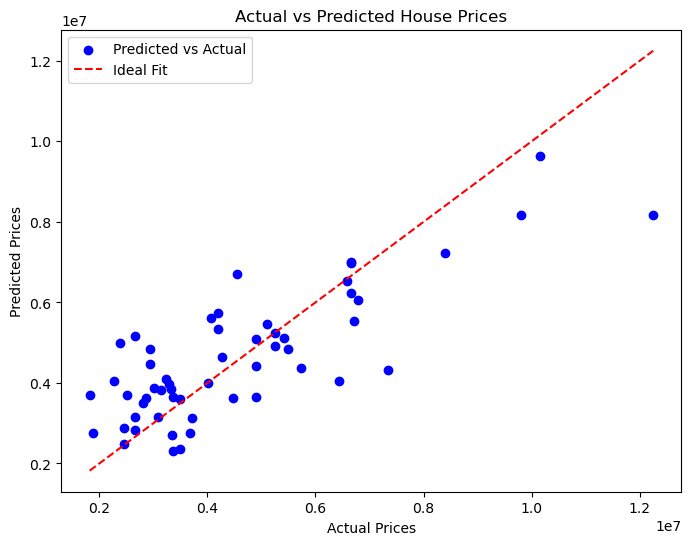

In [287]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()
